## ABOUT DATASET

**Context**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, 
and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published 
experiments refer to using a subset of 14 of them. The "target" field refers to the presence of 
heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Attribute Information:**
    
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
# Import all the tools we need

# Data Analysis and ploting libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [2]:
# loading data from csv file 
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data exploration (exploratory data analysis or EDA)

The goal about here is to find out more about data and become subject matter expert in the data that 
we are working with.

1. What question(s) are we trying to answer?
2. What kind of data do we have and how do we treat different type?
3. What are missing from data and how do we deal with them?
4. What are outliers and why should we care about them?
5. How can we add, change, and remove feature to get more out of the data?



In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# lets find out how many of each class are there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# 

In the below bar graph (1) indicates the patients having heard disease and (0) indicates the patients not having
heard disease

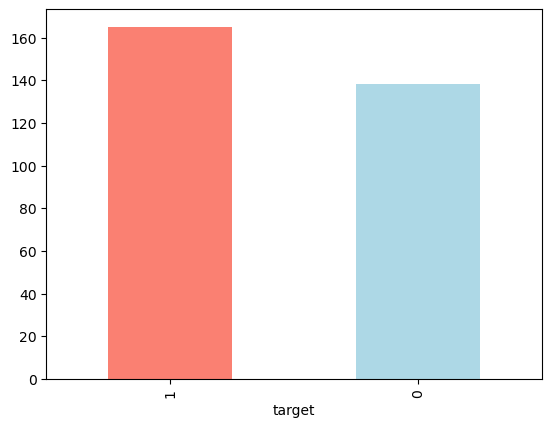

In [6]:
# visualize the targer column
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Lets look for missing value in our dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Lets compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


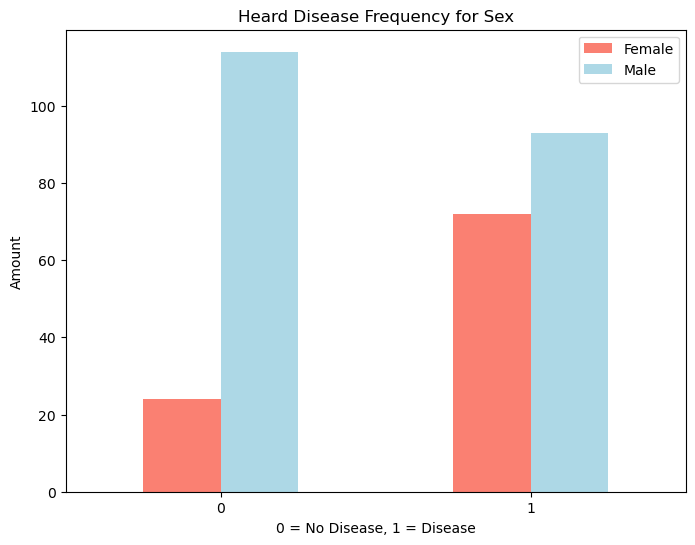

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8, 6), color=["salmon", "lightblue"])

plt.title("Heard Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age Vs Max Heart Rate for Heard Disease

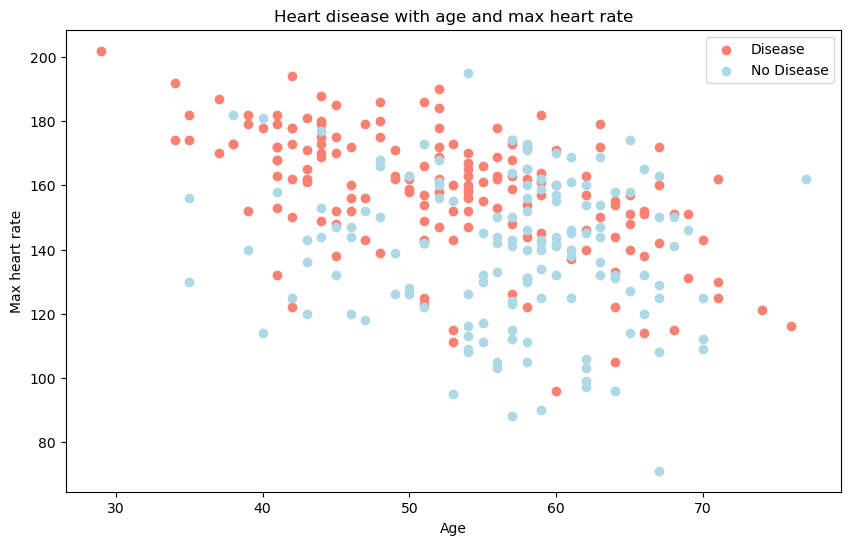

In [13]:
# Lets create a figure
plt.figure(figsize=(10, 6))

# Scatter plot with positive example
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")

# Scatter plot with negative example
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")

# Customizing the figure
plt.title("Heart disease with age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);

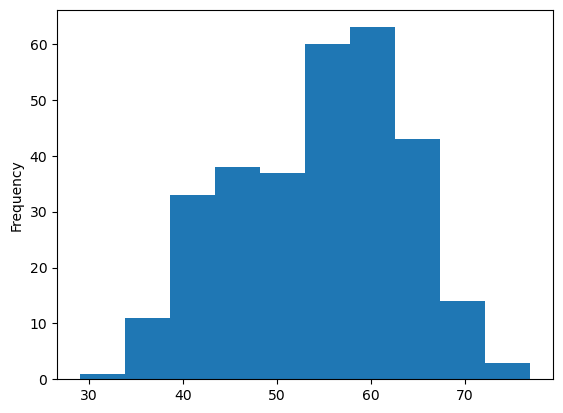

In [14]:
# Lets see the distribution of age
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

**Chest Pain Type:**
    
    0. Typical angina
    1. Atypical angina
    2. Non-anginal pain
    3. Asympotmatic 

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

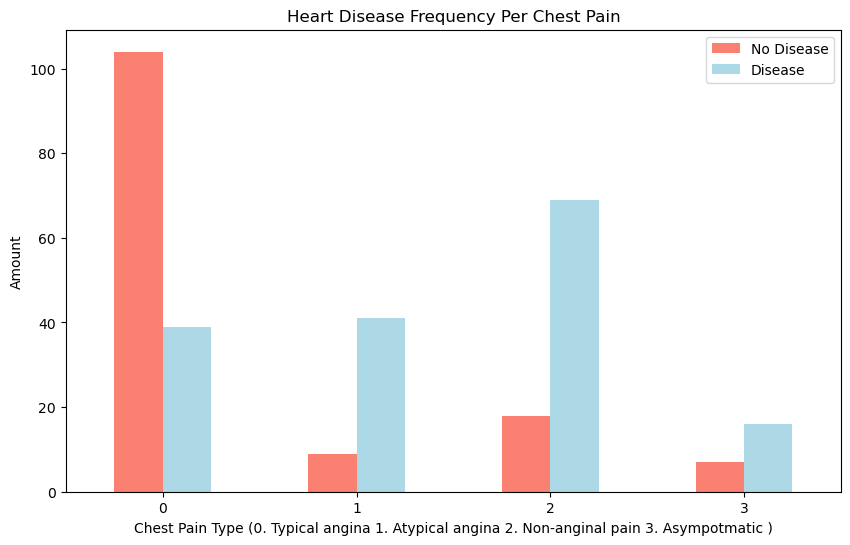

In [16]:
# Lets make a crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency Per Chest Pain")
plt.xlabel("Chest Pain Type (0. Typical angina 1. Atypical angina 2. Non-anginal pain 3. Asympotmatic )")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

## Corelation between different independent variables

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


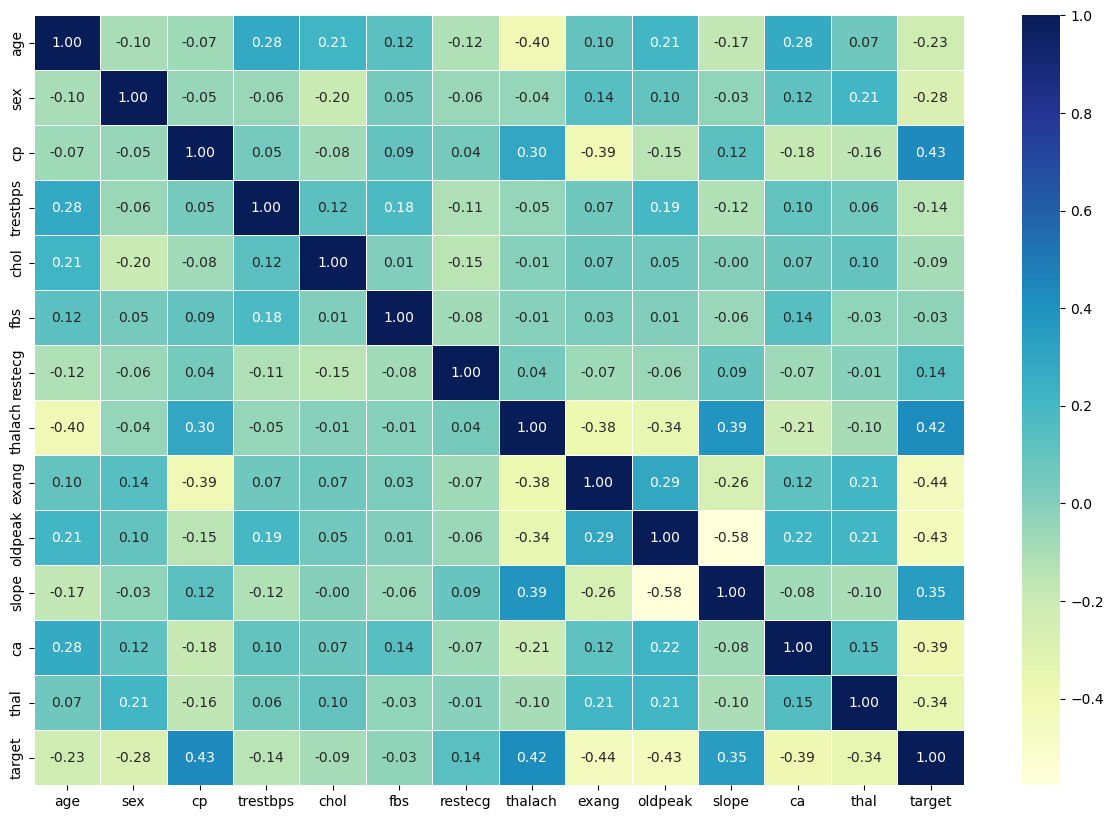

In [18]:
# Lets make our corelation matrix more visually appealing
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Lets prepare our data into x and y variables
X = df.drop("target", axis=1)

y = df["target"]


In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Initiate the random seed for train and test split
np.random.seed(42)

# SPlit the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##

Now, we have splited our data into train and test set. Next, it is time to build machine learning model
We will train the model using train data set 
then we'll test the model using test data set

We are going to try 3 different machine learning model:
1. Logestic Regression
2. K-nearest Neighbours Classifiers
3. Random Forest Classifiers

In [24]:
# Put the models in dict
models = {
    "Logestic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Randon Forest": RandomForestClassifier()
}

# Create a funciton to fit and score the models
def fit_and_score(models, X_train , X_test, y_train, y_test):
    """
    Fit and evaluate the machine learning models
    models - dict of different machine learning model of scikit learn models
    X_train - training dataset without labels
    X_test - testing dataset without labels
    y_train - trainig labels
    y_test - testing labels
    """
    
    # Set a random seed
    np.random.seed(42)
    
    # Dict to hold the models score
    model_scores = {}
    
    # Loop through model
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append the scores to the model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [25]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/tekbista/Desktop/ml-course/heart-disease-project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Randon Forest': 0.8360655737704918}

## Model Comparision

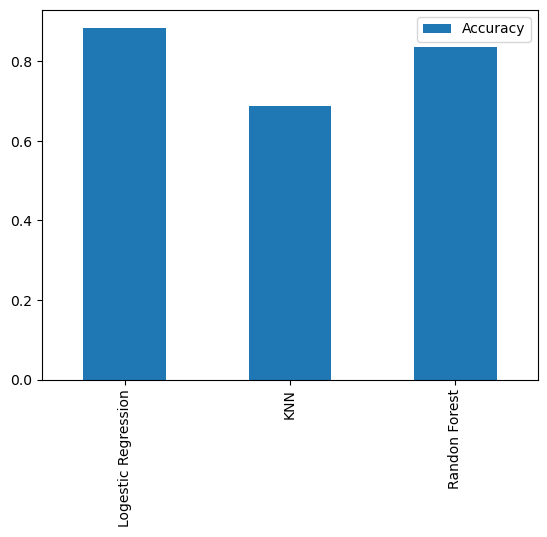

In [26]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

##

Now we have got our baseline model... and we know that our first model's prediction does not meet our expectation. What should we do next?

Let's look at the following

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precission
* Recall
* F1 score
* Classification report 
* ROC curve
* Area under the curve(AUC)

## Hyperparameter Tuning

In [27]:
# Let's tune the knn
training_scores = []
testing_scores = []

# Create a list of different values for n-neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through the different value of n-neighbors
for n in neighbors:
    # Set the parameter
    knn.set_params(n_neighbors=n)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the training scores
    training_scores.append(knn.score(X_train, y_train))
    
    # update the testing scores
    testing_scores.append(knn.score(X_test, y_test))
    

Max KNN score on test data: 75.41%


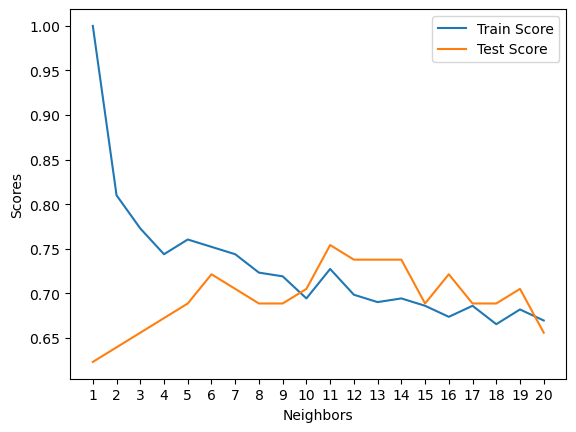

In [28]:
plt.plot(neighbors, training_scores, label="Train Score")
plt.plot(neighbors, testing_scores, label="Test Score")
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.legend()

plt.xticks(np.arange(1, 21, 1))

print(f"Max KNN score on test data: {max(testing_scores) * 100:.2f}%")

## Hyperparameter Tuning Using RandomizedSearchCV & GirdSearchCV

In [42]:
# Instentiate the model
log_reg = LogisticRegression()

# Create a param dict
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),                 # Inverse of regularization strength
    'solver': ['liblinear']             # Solvers that support L1 and elasticnet          
}

rfc_param_grid = {
    'n_estimators': np.arange(100, 1001, 100),   # Number of trees
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 20, 2],
    'min_samples_leaf': [1, 2, 4]
}


## 

Now we have got our hyperparameter grid ready for both of our model. Lets tune them using RandmizedSearchCV

In [43]:
# Tune Logistic Regression
np.random.seed(42)

# Lets search through LogisticRegression using random hyperparameters
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_param_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the random hyperparameter model for logestic regression
rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.23357214690901212)}

In [45]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

##

Now we've tuned LogisticRegression(). Lets do the same for RandomForestClassifier()

In [46]:
# Tune Random Forest Classifier
np.random.seed(42)

# Lets search through RandomForestClassifier using random hyperparameters
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rfc_param_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the random hyperparameter model for logestic regression
rs_rfc.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 20, ...], 'n_estimators': array([ 100, ..., 900, 1000])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [47]:
# Lets check the best params
rs_rfc.best_params_

{'n_estimators': np.int64(1000),
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [48]:
# Lets eveluate the score from the model
rs_rfc.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Since our LogesticRegression model perform the best, we will again try to improve it more using GridSearchCV.

In [62]:
# Let us use different hyperparamters for our LogesticRegression model
log_reg_grid = {
    'penalty': ["l1", "l2"],
    'C': np.logspace(-4, 4, 30),
    'solver': ["liblinear"]
}

# set up gird parameters for LogesticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          scoring="accuracy",
                          cv=5,
                          verbose=2,
                          n_jobs=-1
                         )

# Fit the model with train set
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [63]:
# Lets check for the best params
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'penalty': 'l2', 'solver': 'liblinear'}

In [64]:
# Lets see the score of the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0003562247890262444, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=62.10

[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0003562247890262444, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END

[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05736152510448681, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=

[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0003562247890262444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1

[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01610262027560939, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1082636733874054, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.37382379

## Evaluating our tuned machine learning model beyond the accuracy.

* ROC Curve & AUC Score
* Confusion matrix
* Classification report
* precission
* recall
* f1_score

... and it would be great if cross validation was used where possible

## 

To make comparison and eveluate our model, first we need to make prediction. So, lets do that first.

In [65]:
# Make prediction with our tuned model
y_preds = gs_log_reg.predict(X_test)

In [66]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

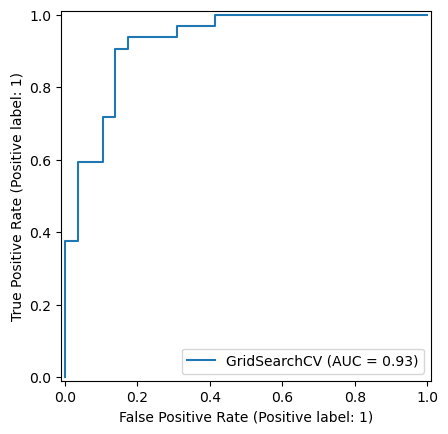

In [81]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [83]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [91]:
# Lets give nice look to our confusion matrix


def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     )
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")

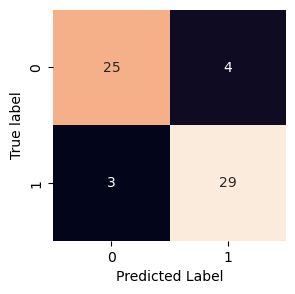

In [92]:
plot_confusion_matrix(y_test, y_preds)

Now, we have got ROC curve, AUC matrix, and confusion matrix. lets get classification report, recall, precision and f1_score as well.

In [94]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation matrix using corss validation 

We're going to calculate precission, recall, and f1_score using cross validation. So, we are using `cross_val_score()`.

In [95]:
# Check for best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'penalty': 'l2', 'solver': 'liblinear'}

In [96]:
# Create a new classifier with the best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         penalty='l2',
                         solver='liblinear')



In [102]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [103]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [104]:
# Cross-validation precission
cv_precission = cross_val_score(clf,
                                X, 
                                y, 
                                cv=5,
                                scoring="precision")
cv_precission = np.mean(cv_precission)
cv_precission

np.float64(0.8215873015873015)

In [106]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                            X, 
                            y, 
                            cv=5,
                            scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [107]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf,
                            X, 
                            y, 
                            cv=5,
                            scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

## Visualize cross validation matrix

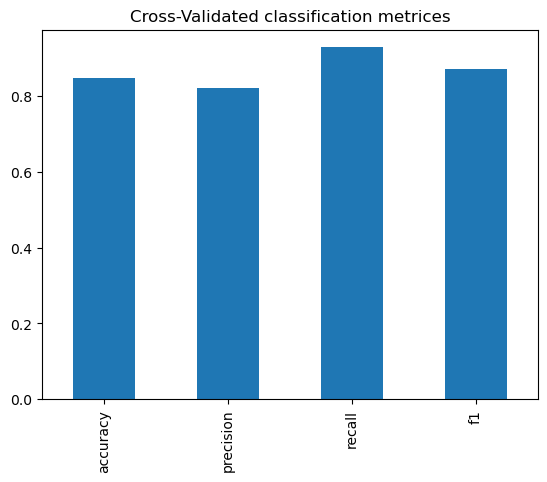

In [114]:
# visualize cross validation matrix
cv_metrices = pd.DataFrame({
    "accuracy": cv_acc,
    "precision": cv_precission,
    "recall": cv_recall,
    "f1": cv_f1,
    
}, index=[0])

cv_metrices.T.plot.bar(title="Cross-Validated classification metrices", legend=False);

## Feature Importance

Let us find the feature importance for our logestic regression model.

In [116]:
# Create a new classifier with the best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         penalty='l2',
                         solver='liblinear')

# Fit the model with the train set
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [117]:
# check the coefficient 
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [118]:
# Lets combine the coefficient with the column in our data and see
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

<Axes: title={'center': 'Feature Importance'}>

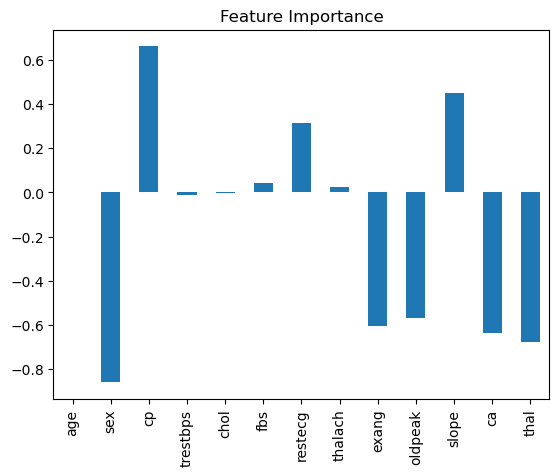

In [120]:
# Lets visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)